# Analyzing World Happiness and Economic Freedom
### MA346 Project By John Giaquinto and Christopher Consiglio

Our project utiizes a number of packages. We begin by importing all of the packages that we will use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

No output indicates that the packages were imported successfully.

The aim of our project is to compare the subjective life satisfaction of people in various countries (obtained from the World Happiness Report) with data from the Heritage Foundation's Index of Economic Freedom. Both the life satisfaction data and the economic freedom data are in seperate CSV files. We will begin by reading the happiness CSV into its own dataframe: `happiness_by_country`. For the purposes of this project, we will use the terms "happiness" and "life satisfaction" synonymously.

The original data sets can be found at the following URLs:

https://ourworldindata.org/happiness-and-life-satisfaction

https://www.heritage.org/index/

In [2]:
happiness_by_country = pd.read_csv("Self-Reported Happiness by Country.csv") #Read the CSV to a dataframe
happiness_by_country #Display the dataframe

,Entity,Code,Year,Life satisfaction in Cantril Ladder (World Happiness Report 2021)
0,Afghanistan,AFG,2008,3.724
1,Afghanistan,AFG,2009,4.402
2,Afghanistan,AFG,2010,4.758
3,Afghanistan,AFG,2011,3.832
4,Afghanistan,AFG,2012,3.783
...,...,...,...,...
1944,Zimbabwe,ZWE,2016,3.735
1945,Zimbabwe,ZWE,2017,3.638
1946,Zimbabwe,ZWE,2018,3.616
1947,Zimbabwe,ZWE,2019,2.694


Inside the dataframe, we can see what we have the life satisfaction rating for most countries for multiple years.

Next, we will read the Index of Economic Freedom CSV into its own dataframe: `index_of_economic_freedom`. For columns with values in U.S. Dollars, we also want to remove commas and dollar signs and convert the values in these columns to floats so we can use the data to perform calculations.

In [3]:
#Read the CSV to a dataframe
index_of_economic_freedom = pd.read_csv("Heritage_Index_of_Economic_Freedom.csv")

#Remove , and $ from GDP (Billions, PPP)
index_of_economic_freedom['GDP (Billions, PPP)'] = index_of_economic_freedom['GDP (Billions, PPP)'].str.replace(',', '')
index_of_economic_freedom['GDP (Billions, PPP)'] = index_of_economic_freedom['GDP (Billions, PPP)'].str.replace('$', '')
index_of_economic_freedom['GDP (Billions, PPP)'] = index_of_economic_freedom['GDP (Billions, PPP)'].astype(float)

#Remove , and $ from GDP Per Capita (PPP)
index_of_economic_freedom['GDP per Capita (PPP)'] = index_of_economic_freedom['GDP per Capita (PPP)'].str.replace(',', '')
index_of_economic_freedom['GDP per Capita (PPP)'] = index_of_economic_freedom['GDP per Capita (PPP)'].str.replace('$', '')
index_of_economic_freedom['GDP per Capita (PPP)'] = index_of_economic_freedom['GDP per Capita (PPP)'].astype(float)

#Remove , from FDI Inflow (Millions)
index_of_economic_freedom['FDI Inflow (Millions)'] = index_of_economic_freedom['FDI Inflow (Millions)'].str.replace(',', '')
index_of_economic_freedom['FDI Inflow (Millions)'] = index_of_economic_freedom['FDI Inflow (Millions)'].astype(float)

#Display the dataframe
index_of_economic_freedom

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.9,78.7,-5.0,1.0,2390.0,11.7,5.6,13.0,7.8
1,2,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,30.5,2.8,40.7,-3.5,2.0,14218.0,11.7,1.6,1107.0,76.0
2,3,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,37.8,43.9,491.5,-6.0,0.1,11112.0,12.8,2.4,1125.0,53.1
3,4,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,21.3,32.9,215.1,-4.0,-1.9,6932.0,7.7,22.3,-1866.0,127.1
4,5,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,39.6,45.4,941.8,-10.0,-2.8,20751.0,11.7,42.0,4123.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,4.6,7.1,...,26.9,28.4,144.7,-30.0,-23.5,5178.0,9.1,2355.1,959.0,304.1
180,180,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,...,22.0,97.3,1058.7,2.9,6.1,10869.0,2.3,3.2,15800.0,46.6
181,181,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.8,62.6,-5.0,-3.3,1927.0,13.4,26.2,-371.0,83.2
182,182,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,...,29.8,18.4,63.1,-3.5,1.9,3342.0,12.2,16.4,234.0,117.8


The dataframe was created successfully. Aside from the economic freedom rankings and scores, we have 26 different variables we can analyze.

## Select Most Recent Years from Happiness Report

We want to merge the two data sets with an inner join, but because we have life satisfaction data for multiple years for each country, merging the two data sets will be difficult. We could use an outer join, but for analysis purposes we will instead get the latest life satisfaction data for each country.

In [4]:
#We will use the sqldf package to get the latest data for each country using a SQL query
pysqldf = lambda q: sqldf(q, globals())

#Select the maximum year (which we'll call "Latest Happiness Year") for each country
q = """SELECT Entity, MAX(Year) as 'Latest Happiness Year', "Life satisfaction in Cantril Ladder (World Happiness Report 2021)" AS LifeSatisfaction
        FROM happiness_by_country
        GROUP BY Entity;"""
latest_happiness = pysqldf(q)

#Display the dataframe
latest_happiness

,Entity,Latest Happiness Year,LifeSatisfaction
0,Afghanistan,2019,2.375
1,Albania,2020,5.365
2,Algeria,2019,4.745
3,Angola,2014,3.795
4,Argentina,2020,5.901
...,...,...,...
161,Venezuela,2020,4.574
162,Vietnam,2019,5.467
163,Yemen,2019,4.197
164,Zambia,2020,4.838


The output indicates out SQL query was successful. We now have only the latest life satisfaction data for each country.

## Merge Datasets Together

Now we can merge the two datasets on countries. In the index of economic freedom, the countries column is titled `Country Name`. In the life satisfaction data, the countries column is called `Entity`.

In [5]:
#We will use an inner join on Country Name and Entity
full_data = index_of_economic_freedom.merge(latest_happiness, left_on='Country Name', right_on='Entity', how='inner')
full_data.drop('Entity', axis=1, inplace=True) #Since we have Country Name, Entity is redundant. We can drop it
full_data = full_data.dropna() #For for the analysis we do later, we also cant have missing data
full_data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Latest Happiness Year,LifeSatisfaction
1,2,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,40.7,-3.5,2.0,14218.0,11.7,1.6,1107.0,76.0,2020,5.365
2,3,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,491.5,-6.0,0.1,11112.0,12.8,2.4,1125.0,53.1,2019,4.745
3,4,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,215.1,-4.0,-1.9,6932.0,7.7,22.3,-1866.0,127.1,2014,3.795
4,5,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,941.8,-10.0,-2.8,20751.0,11.7,42.0,4123.0,103.0,2020,5.901
5,6,Armenia,Armenia,Europe,58.0,34.0,65.3,50.4,33.1,50.8,...,39.4,-7.6,2.6,13261.0,20.2,1.2,117.0,62.8,2019,5.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,177,Uzbekistan,Uzbekistan,Asia-Pacific,117.0,25.0,55.7,31.6,13.1,23.8,...,252.6,1.6,4.7,7449.0,6.0,12.9,1726.0,37.9,2019,6.154
154,179,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,4.6,7.1,...,144.7,-30.0,-23.5,5178.0,9.1,2355.1,959.0,304.1,2020,4.574
155,180,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,...,1058.7,2.9,6.1,10869.0,2.3,3.2,15800.0,46.6,2019,5.467
157,182,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,...,63.1,-3.5,1.9,3342.0,12.2,16.4,234.0,117.8,2020,4.838


As the output indicates, the merge was successful. Our life satisfaction data is now in the same dataframe as our index of economic freedom data.

Later on, we will seperately analyze some of this data using a Streamlit dashboard. We still have more analysis to do in this notebook, so we will save our current dataframe as a CSV file and analyze that CSV file with Streamlit.

In [6]:
full_data.to_csv("happiness_and_economic_freedom.csv")

No output indicates that the CSV was created successfully. It can be found in the Files pane on the right side of the screen.

## Examining Economic Freedom Correlation with Life Satisfaction

We want to see how life satisfaction within a country correlates with economic freedom. 

In [7]:
economic_freedom_life_satisfaction_correlation = full_data['2022 Score'].corr(full_data['LifeSatisfaction'])
economic_freedom_life_satisfaction_correlation

0.7255356795479755

The correlation coefficient 0.726 indicates there is a strong correlation between economic freedom and life satisfaction.

The Heritage Foundation scores economic freedom based on many different factors. Some of those factors may skew the correlation between economic freedom and life satisfaction. Let's look at how the individual factors that make up economic freedom correlate with life satisfaction.

In [8]:
economic_freedom_variables = full_data.iloc[:, 7:33] #The individual variables start with Property Rights in column 7 and end with Public debt in column 32 
life_satisfaction = full_data.iloc[:,34] #Life satiscation is the final column of the full_data dataframe

correlation = economic_freedom_variables.corrwith(life_satisfaction)

#We willsort the correlations so its easier to see how the variables comapre to one another
correlation = correlation.to_frame('Life Satisfaction').sort_values(by='Life Satisfaction',ascending=False)
correlation #Display the dataframe

,Life Satisfaction
Business Freedom,0.794912
GDP per Capita (PPP),0.741844
Government Integrity,0.715500
Property Rights,0.711234
Judical Effectiveness,0.676020
Trade Freedom,0.638791
Financial Freedom,0.628647
Tax Burden % of GDP,0.582470
Gov't Expenditure % of GDP,0.577644
Investment Freedom,0.554894


From the output, we can see that some variables correlate positively with life satisfaction, and some correlate negatively. For example, the correlation coefficient of `Life Satisfaction` and `Business Freedom` is extremely high (0.795), whereas the correlation coefficient of `Tarrif Rate (%)` and `Life Satisfaction` (-0.57) indicates a moderate negative correlation. Other variables, such as `Public Debt (% of GDP)` do not correlate with `Life Satisfaction`. The correlation coefficient of `Public Debt (% of GDP)` and `Life Satisfaction` is 0.00006.

To visualize the correlation coefficients and make them easier to quickly comprehend, we can use a heatmap.

<AxesSubplot:>

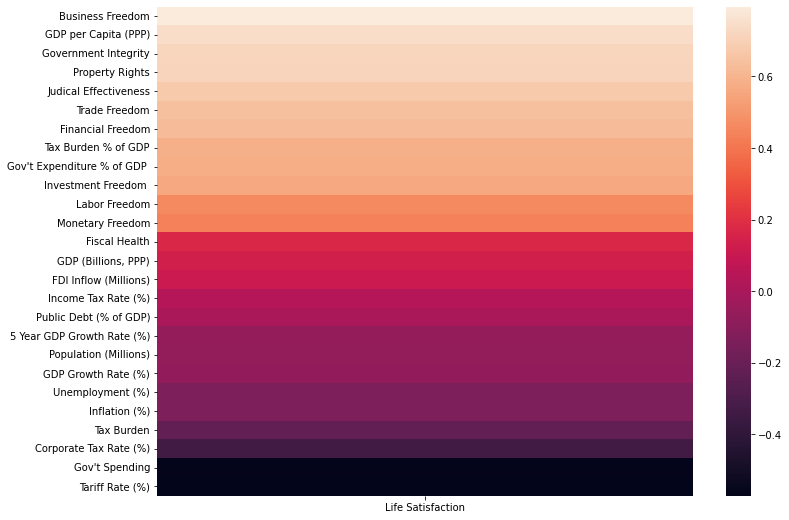

In [9]:
plt.figure(figsize=(12, 9)) #The default figure size is not large enough to display every correlation, so we increase the size here
correlation_heatmap=sns.heatmap(correlation)
correlation_heatmap

Dark purple and black indicate a negative correlation where as light orange indicates a positive correlation. Bright red indicates a very weak correlation (if any at all). There seems to be slightly more economic freedom variables that correlate positively with life satisfaction than variables that correlate negatively.  

# Regression Model

For the challenging step of our project, we decided to make a regression model to predict life satisfaction. Due to multicollinearity, we were not able to add every single variable in the index of economic freedom to the regression model. We werent sure what variables were the best to use, so we started out using stepwise regression to help us find the best variables. The function below, forward_selected, was written by Aaron and Trevor from PlanSpace https://planspace.org/20150423-forward_selection_with_statsmodels/

In [10]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

No output indicates that Aaron and Trevor's function was created successfully.

Before we use the forward_selected function, we have to remove the columns from our dataframe that we don't want included in our regression model. These columns are `CountryID`, `WEBNAME`, `Region`, `World Rank`, `Region Rank`, and `Latest Happiness Year`. The function also does not work with special characters and numbers in column names, so we need to replace special characters and numbers.

In [11]:
#Remove columns we don't want in our regression model
full_data_clean = full_data.drop(full_data[['CountryID', 'WEBNAME', 'Region', 'World Rank', 'Region Rank', 'Latest Happiness Year']], axis = 1)
full_data_clean = full_data_clean.set_index('Country Name') #Set the index as country name so Country Name is not included as a variable in the regression model

#Replace all special characters with spaces (except for %, which we replace with 'Pct')
full_data_clean.columns = full_data_clean.columns.str.replace(' ', '')
full_data_clean.columns = full_data_clean.columns.str.replace('\'', '')
full_data_clean.columns = full_data_clean.columns.str.replace('%', 'Pct')
full_data_clean.columns = full_data_clean.columns.str.replace('(', '')
full_data_clean.columns = full_data_clean.columns.str.replace(')', '')
full_data_clean.columns = full_data_clean.columns.str.replace(',', '')

#Replace all numbers with words
full_data_clean.columns = full_data_clean.columns.str.replace('2022', 'TwentyTwentyTwo')
full_data_clean.columns = full_data_clean.columns.str.replace('5', 'Five')

full_data_clean

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


,TwentyTwentyTwoScore,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,LaborFreedom,MonetaryFreedom,...,PopulationMillions,GDPBillionsPPP,GDPGrowthRatePct,FiveYearGDPGrowthRatePct,GDPperCapitaPPP,UnemploymentPct,InflationPct,FDIInflowMillions,PublicDebtPctofGDP,LifeSatisfaction
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,66.6,55.5,49.8,35.6,89.1,72.1,70.6,70.7,51.1,82.0,...,2.8,40.7,-3.5,2.0,14218.0,11.7,1.6,1107.0,76.0,5.365
Algeria,45.8,27.9,29.7,30.1,67.2,57.1,38.6,50.0,51.5,80.1,...,43.9,491.5,-6.0,0.1,11112.0,12.8,2.4,1125.0,53.1,4.745
Angola,52.6,39.8,25.3,20.6,86.6,86.4,80.0,37.6,53.9,61.2,...,32.9,215.1,-4.0,-1.9,6932.0,7.7,22.3,-1866.0,127.1,3.795
Argentina,50.1,35.1,57.9,45.1,73.3,53.0,16.8,55.1,51.0,37.9,...,45.4,941.8,-10.0,-2.8,20751.0,11.7,42.0,4123.0,103.0,5.901
Armenia,65.3,50.4,33.1,50.8,86.9,78.9,75.5,64.9,47.2,77.5,...,3.0,39.4,-7.6,2.6,13261.0,20.2,1.2,117.0,62.8,5.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,55.7,31.6,13.1,23.8,90.8,78.1,96.6,59.1,48.0,61.6,...,34.2,252.6,1.6,4.7,7449.0,6.0,12.9,1726.0,37.9,6.154
Venezuela,24.8,0.2,4.6,7.1,74.1,78.3,0.0,30.8,37.6,0.0,...,28.4,144.7,-30.0,-23.5,5178.0,9.1,2355.1,959.0,304.1,4.574
Vietnam,60.6,49.6,33.8,33.6,80.9,85.5,78.8,73.6,53.9,68.8,...,97.3,1058.7,2.9,6.1,10869.0,2.3,3.2,15800.0,46.6,5.467


As can be seen in the output, we successfully removed the columns we don't need and renamed the columns that needed to be renamed.

Now we will create a regression model using forward_selected. It returns a statsmodels.formula.api, so to see the results of the model we can print a summary of the model using .summary()

In [12]:
print(forward_selected(full_data_clean, 'LifeSatisfaction').summary())

                            OLS Regression Results                            
Dep. Variable:       LifeSatisfaction   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     32.76
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.28e-37
Time:                        21:14:18   Log-Likelihood:                -105.62
No. Observations:                 151   AIC:                             243.2
Df Residuals:                     135   BIC:                             291.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Even with stepwise regression, we have too many variables involved. We are having issues with multicollinearity, and some of our coefficients don't make sense. For example, PropertyRights should not have a negative coefficient, as we found earlier that out of all of our variables, PropertyRights has the 4th most positive correlation with life satisfaction.

### Trim #1

To improve our model, we will remove every variables from the dataframe that had a p-value greater than 0.05. These variables are not statistically significant in predicting life satisfaction. Using the remaining set of variables, we will generate futher fine-tuned regression models. We learned to create regession models using the statsmodel package from this article: https://datatofish.com/statsmodels-linear-regression/

In [13]:
# Drop columns that still had p-values greater than 0.05
full_data_clean_trimmed = full_data_clean.drop(['TariffRatePct', 'TaxBurdenPctofGDP', 'JudicalEffectiveness', 'PopulationMillions', 'GDPBillionsPPP', 'InflationPct', 'GDPGrowthRatePct', 'TradeFreedom'], axis = 1)

regression_columns = full_data_clean_trimmed.columns[:-1] #The final column is Life Satisfaction, our response variable
X = full_data_clean_trimmed[regression_columns]
Y = full_data_clean_trimmed['LifeSatisfaction']

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:       LifeSatisfaction   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     23.38
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           3.88e-33
Time:                        21:14:18   Log-Likelihood:                -109.77
No. Observations:                 151   AIC:                             259.5
Df Residuals:                     131   BIC:                             319.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

This new model still isn't great. There are too many variables with high p-values, and we still have coefficients that don't make much sense (e.g., Property Rights is still negative.)

### Trim #2

This time, let's remove `GovernmentIntegrity`, `GovtSpending`, `LaborFreedom`, `MonetaryFreedom`, `InvestmentFreedom`, `CorporateTaxPct`, `GovtExpenditurePctofGDP`, `FiveYearGDPGrowthRatePct`, `FDIInflowMillions`, and `PublicDeptPctofGDP`. All of these variables have high p-values.

In [14]:
# Drop columns that still had p-values greater than 0.05
full_data_clean_trimmed = full_data_clean_trimmed.drop(['GovernmentIntegrity', 'GovtSpending','LaborFreedom','MonetaryFreedom','InvestmentFreedom','CorporateTaxRatePct', 'GovtExpenditurePctofGDP', 'FiveYearGDPGrowthRatePct','FDIInflowMillions','PublicDebtPctofGDP'], axis = 1)

regression_columns = full_data_clean_trimmed.columns[:-1] #The final column is Life Satisfaction, our response variable
X = full_data_clean_trimmed[regression_columns]
Y = full_data_clean_trimmed['LifeSatisfaction']

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       LifeSatisfaction   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     46.13
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           9.96e-38
Time:                        21:14:18   Log-Likelihood:                -117.88
No. Observations:                 151   AIC:                             255.8
Df Residuals:                     141   BIC:                             285.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.9000 

Our model is getting much better, but it's still not perfect. We still have variables with p-values over 0.05.

### Trim #3

Let's drop `TwentyTwentyTwoScore`, `FiscalHealth`, and `FinancialFreedom` and see how our new model will look.

In [15]:
# Drop columns that still had p-values greater than 0.05
full_data_clean_trimmed = full_data_clean_trimmed.drop(['TwentyTwentyTwoScore','FiscalHealth','FinancialFreedom'], axis = 1)

regression_columns = full_data_clean_trimmed.columns[:-1] #The final column is Life Satisfaction, our response variable
X = full_data_clean_trimmed[regression_columns]
Y = full_data_clean_trimmed['LifeSatisfaction']

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
 
print_model = model.summary()
coefficients = model.params[1:]
print(print_model)
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:       LifeSatisfaction   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     68.19
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.24e-39
Time:                        21:14:18   Log-Likelihood:                -119.88
No. Observations:                 151   AIC:                             253.8
Df Residuals:                     144   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1426      1.065  

Our model is looking much better. It shouldn't need much more trimming. Maybe it could use one more trim.

### Trim #4

`PropertyRights` is the only variable with a high p-value this time. Interestingly, its coefficient is still negative. Let's drop it.

In [16]:
# Drop columns that still had p-values greater than 0.05
full_data_clean_trimmed = full_data_clean_trimmed.drop(['PropertyRights'], axis = 1)

regression_columns = full_data_clean_trimmed.columns[:-1] #The final column is Life Satisfaction, our response variable
X = full_data_clean_trimmed[regression_columns]
Y = full_data_clean_trimmed['LifeSatisfaction']

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
 
print_model = model.summary()
coefficients = model.params
print(print_model)
print(coefficients) #Our final coefficients

                            OLS Regression Results                            
Dep. Variable:       LifeSatisfaction   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     81.04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           3.12e-40
Time:                        21:14:18   Log-Likelihood:                -120.80
No. Observations:                 151   AIC:                             253.6
Df Residuals:                     145   BIC:                             271.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.0208      1.063  

Our final model looks quite good! All of the p-values are very low! Our final coefficients are -0.0445 for `TaxBurdern`, 0.0345 for `BusinessFreedom`, -0.0420 for `IncomeTaxRatePct`, 0.00001325 for `GDPperCapitaPPP`, and -0.0208 for `UnemploymentPct`. Our coefficient of determination (R-squared) is decently high (0.736). 

The condition number indicates that we might still have problems with multicollinearity, but this is not something we can easily avoid with economic variables. Many economic variables are necessairly correlated. For the purposes of this project, we will ignore the multicollinearity. However, a more in-depth analysis of the data would require that the multicollinearity be addressed accounted for.

To test the accuracy of our model, lets predict life satisfaction for each country and compare our predicted values with the known life satisfaction values for each country. We can begin taking a subset of our dataset where we have only the country name, the 5 variables for our model, and life satisfaction.

In [17]:
full_data_clean_trimmed

,TaxBurden,BusinessFreedom,IncomeTaxRatePct,GDPperCapitaPPP,UnemploymentPct,LifeSatisfaction
Country Name,,,,,,
Albania,89.1,70.7,23.0,14218.0,11.7,5.365
Algeria,67.2,50.0,35.0,11112.0,12.8,4.745
Angola,86.6,37.6,25.0,6932.0,7.7,3.795
Argentina,73.3,55.1,35.0,20751.0,11.7,5.901
Armenia,86.9,64.9,22.0,13261.0,20.2,5.488
...,...,...,...,...,...,...
Uzbekistan,90.8,59.1,22.0,7449.0,6.0,6.154
Venezuela,74.1,30.8,34.0,5178.0,9.1,4.574
Vietnam,80.9,73.6,35.0,10869.0,2.3,5.467


The subset of our dataframe looks good. It was created successfully.

We want to add another column to this dataframe with predicted life satisfaction values. The first step is to create a function that will predict life satisfaction for a given country and return the predicted value.

In [18]:
def predicted_life_satisfaction(country):
    country_row = full_data_clean_trimmed[full_data_clean_trimmed['Country Name'] == country] #Individual row for a country

    return(coefficients[0] #Constant
           +country_row.iloc[:,1]*coefficients[1]  #Tax Burden
           +country_row.iloc[:,2]*coefficients[2]  #Business Freedom
           +country_row.iloc[:,3]*coefficients[3]  #Income Tax Rate (%)
           +country_row.iloc[:,4]*coefficients[4]  #GDP Per Capita (PPP)
           +country_row.iloc[:,5]*coefficients[5]) #Unemployment (%)

No output indicates that there were no errors with creating the function.

Now, lets create a `Predicted Life Satisfaction` column for our dataframe. We can use `.apply` with our `predicted_life_satisfaction` function to do this.

In [19]:
full_data_clean_trimmed = full_data_clean_trimmed.reset_index(level=0)
full_data_clean_trimmed['Predicted Life Satisfaction'] = full_data_clean_trimmed[['Country Name']].apply(predicted_life_satisfaction)
full_data_clean_trimmed

,Country Name,TaxBurden,BusinessFreedom,IncomeTaxRatePct,GDPperCapitaPPP,UnemploymentPct,LifeSatisfaction,Predicted Life Satisfaction
0,Albania,89.1,70.7,23.0,14218.0,11.7,5.365,5.472581
1,Algeria,67.2,50.0,35.0,11112.0,12.8,4.745,5.165997
2,Angola,86.6,37.6,25.0,6932.0,7.7,3.795,4.343866
3,Argentina,73.3,55.1,35.0,20751.0,11.7,5.901,5.220917
4,Armenia,86.9,64.9,22.0,13261.0,20.2,5.488,5.223070
...,...,...,...,...,...,...,...,...
146,Uzbekistan,90.8,59.1,22.0,7449.0,6.0,6.154,5.067048
147,Venezuela,74.1,30.8,34.0,5178.0,9.1,4.574,4.235969
148,Vietnam,80.9,73.6,35.0,10869.0,2.3,5.467,5.585314
149,Zambia,70.9,44.2,37.5,3342.0,12.2,4.838,4.605525


The column was created successfully. The values for Predicted Life Satisfaction look pretty accurate.

Let's create a scatter plot to see exactly how accurate our model was. We'll plot predicted life satisfaction (y) against known life satisfaction (x). In a completely accurate model, the points on the scatter plot would look like a 45-degree line (y=x), as each predicted value would be equal to the known values.

Text(0, 0.5, 'Predicted Life Satisfaction')

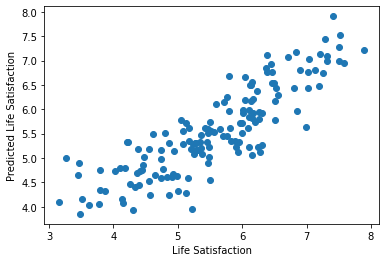

In [20]:
fig , ax = plt.subplots()
ax.scatter(full_data_clean_trimmed['LifeSatisfaction'],full_data_clean_trimmed['Predicted Life Satisfaction'])
ax.set_xlabel('Life Satisfaction')
ax.set_ylabel('Predicted Life Satisfaction')


Overall, the model looks like it did a good job.

To get a clearer picture of how accurate the model is, let's draw a line of best fit (blue) through the scatter plot and compare it with y=x (black). If the blue line matches up with the black y=x, the model is accurate.

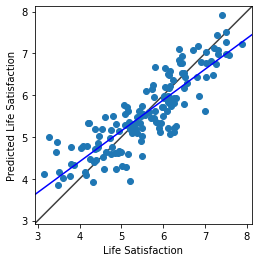

In [21]:
#Here we create the y=x line (in black, which is the default color)
#This particular method of drawing y=x was recomended on https://stackoverflow.com/questions/70380660/how-to-plot-deviation-above-and-below-the-line-x-y-line-in-a-figure
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

#Here we create the line of best fit (in blue)
m, b = np.polyfit(full_data_clean_trimmed['LifeSatisfaction'], full_data_clean_trimmed['Predicted Life Satisfaction'], deg=1)
ax.axline(xy1=(0, b), slope=m, color='b')
fig

Looking at the two lines, we can see that the model is most accurate at predicting life satisfaction when the actual value is fairly average. The model tends to over-estimate life-satisfaction for countries with low true levels and under-estimates for countries with high true values. However, the degree of error is not very significant. The model is still overwhelmingly very accurate.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a8eb658e-6f64-4544-bf57-cd04444e7be6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>